In [21]:
# -------------------------------------------------------------------
# PART B1: Data Acquisition and Loading
# -------------------------------------------------------------------
from matminer.datasets import load_dataset
import pandas as pd
import os

# Load dataset from Matminer
# The MatBench 2D dataset comes from the Materials Project database
# and includes exfoliation energies (target) and structure objects (features)
df = load_dataset("matbench_jdft2d")

print("✅ Dataset successfully loaded!")
print("Shape:", df.shape)
print("Columns:", list(df.columns))
print("\n--- Dataset Preview ---")
display(df.head())

# Document data provenance
print("""
Dataset source:
MatBench benchmark suite (matbench_jdft2d).
Originally compiled from the Materials Project via pymatgen.
Target property: exfoliation energy (eV/atom) for 2D layered materials.
""")

# Save a small random sample to processed folder
os.makedirs("../data/processed", exist_ok=True)
df.sample(50, random_state=42).to_csv("../data/processed/sample_raw.csv", index=False)
print("✅ Sample saved to ../data/processed/sample_raw.csv")

✅ Dataset successfully loaded!
Shape: (636, 2)
Columns: ['structure', 'exfoliation_en']

--- Dataset Preview ---


,structure,exfoliation_en
0,"[[1.49323139 3.32688406 7.26257785] Hf, [3.326...",63.593833
1,"[[1.85068084 4.37698238 6.9301577 ] As, [0. ...",134.863750
2,"[[ 0. 2.0213325 11.97279555] Ti, [ 1...",43.114667
3,"[[2.39882726 2.39882726 2.53701553] In, [0.054...",240.715488
4,[[-1.83484554e-06 1.73300105e+00 2.61675943e...,67.442833



Dataset source:
MatBench benchmark suite (matbench_jdft2d).
Originally compiled from the Materials Project via pymatgen.
Target property: exfoliation energy (eV/atom) for 2D layered materials.

✅ Sample saved to ../data/processed/sample_raw.csv


Original dataset shape: (636, 2)


,structure,exfoliation_en
0,"[[1.49323139 3.32688406 7.26257785] Hf, [3.326...",63.593833
1,"[[1.85068084 4.37698238 6.9301577 ] As, [0. ...",134.863750
2,"[[ 0. 2.0213325 11.97279555] Ti, [ 1...",43.114667
3,"[[2.39882726 2.39882726 2.53701553] In, [0.054...",240.715488
4,[[-1.83484554e-06 1.73300105e+00 2.61675943e...,67.442833


Type of first structure: <class 'pymatgen.core.structure.Structure'>


DensityFeatures:   0%|          | 0/636 [00:00<?, ?it/s]

Columns after featurization: ['structure', 'exfoliation_en', 'density', 'vpa', 'packing fraction']
Featurized dataset shape (after cleaning): (635, 4)


,density,packing fraction,vpa,exfoliation_en
0,3.021472,0.177875,61.218660,63.593833
1,1.124487,0.057581,110.637295,134.863750
2,1.385515,0.108929,57.436271,43.114667
3,1.950268,0.118812,137.847700,240.715488
4,1.183135,0.083167,58.435112,67.442833


Sample saved successfully to ../data/processed/sample.csv


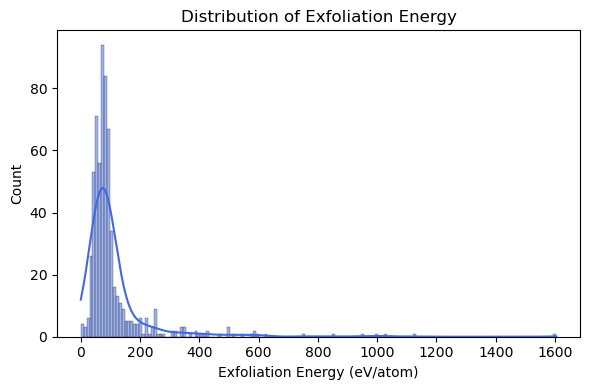

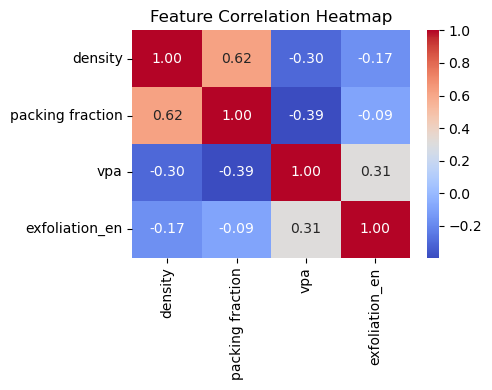

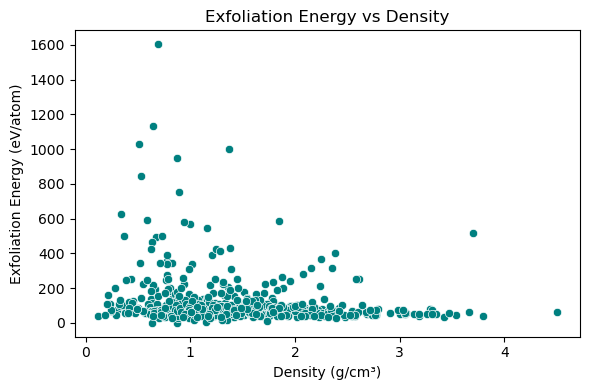

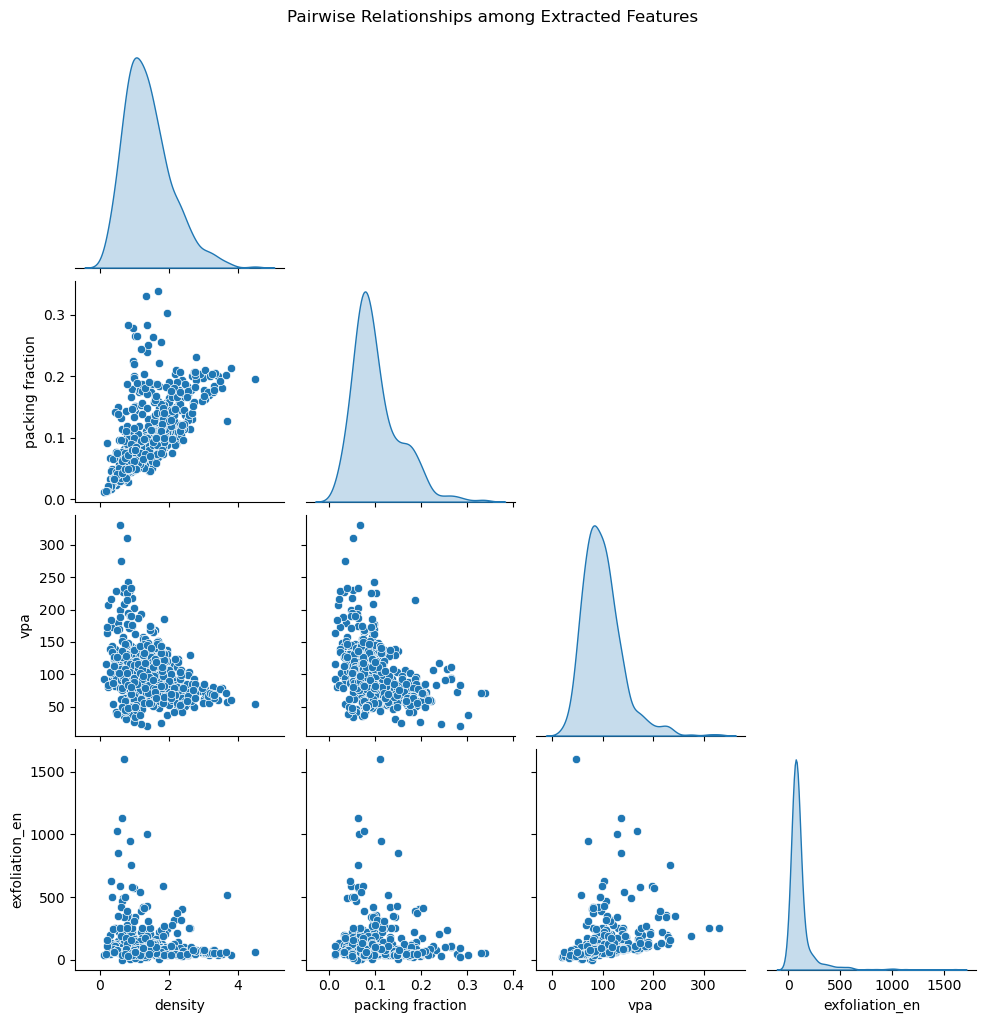

<Figure size 600x300 with 0 Axes>

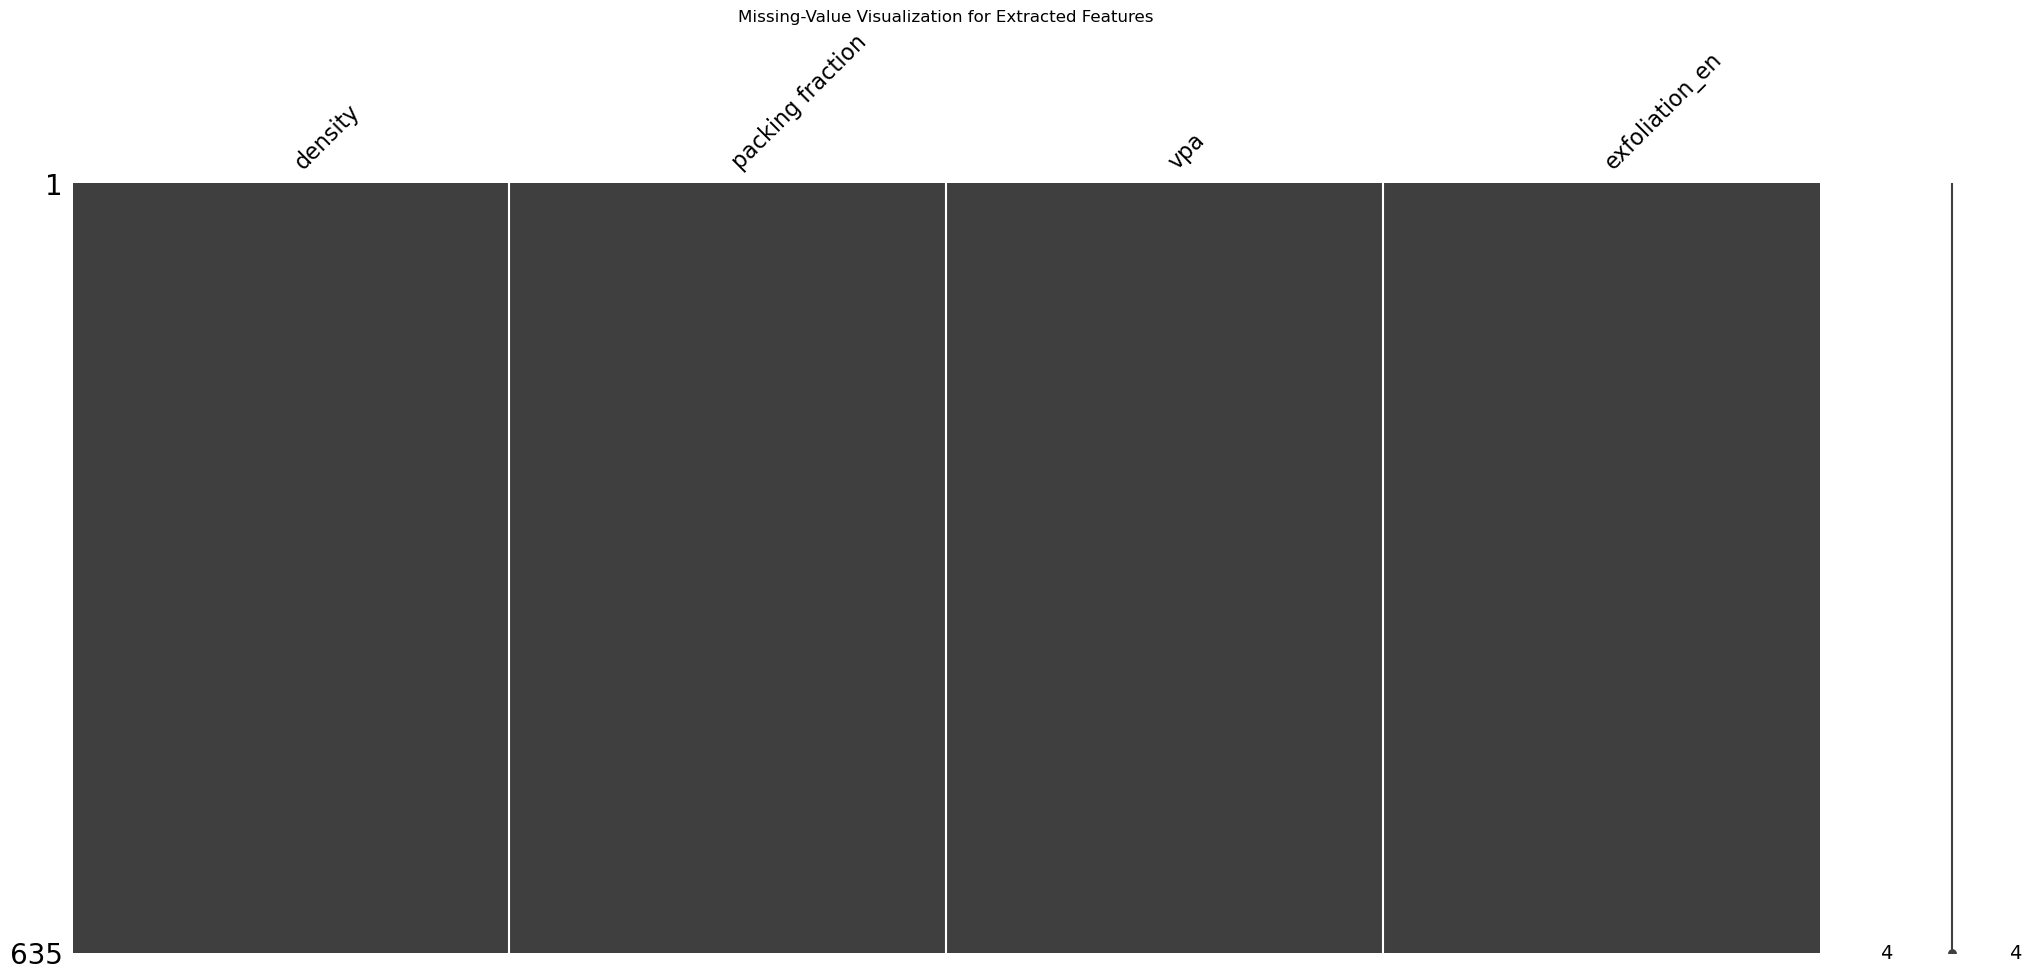

In [20]:
# -------------------------------------------------------------------
# PART B1: Load Dataset and Save Sample
# -------------------------------------------------------------------
from matminer.datasets import load_dataset
from matminer.featurizers.structure import DensityFeatures
import pandas as pd
import os

# Load dataset
df = load_dataset("matbench_jdft2d")

print("Original dataset shape:", df.shape)
display(df.head())

# ✅ Structures are already pymatgen Structure objects – no conversion needed
# Just verify the type:
print("Type of first structure:", type(df.iloc[0]["structure"]))

# -------------------------------------------------------------------
# Extract density-related features safely
# -------------------------------------------------------------------
density_featurizer = DensityFeatures()
df_feat = density_featurizer.featurize_dataframe(df, "structure", ignore_errors=True)

# Show what columns we actually got
print("Columns after featurization:", list(df_feat.columns))

# Keep exfoliation energy + any density-related features that exist
keep_cols = [col for col in ["density", "packing fraction", "vpa", "volume", "exfoliation_en"] if col in df_feat.columns]
df_feat = df_feat[keep_cols]

# Drop rows with missing values
df_feat = df_feat.dropna()

print("Featurized dataset shape (after cleaning):", df_feat.shape)
display(df_feat.head())

# Ensure processed data folder exists
os.makedirs("../data/processed", exist_ok=True)
df_feat.sample(50).to_csv("../data/processed/sample.csv", index=False)
print("Sample saved successfully to ../data/processed/sample.csv")

# -------------------------------------------------------------------
# PART B2: Exploratory Data Analysis (EDA)
# -------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Ensure figures directory exists
os.makedirs("../../figures", exist_ok=True)

# 1️⃣ Distribution of the Target Variable
plt.figure(figsize=(6,4))
sns.histplot(df_feat["exfoliation_en"], kde=True, color="royalblue")
plt.xlabel("Exfoliation Energy (eV/atom)")
plt.ylabel("Count")
plt.title("Distribution of Exfoliation Energy")
plt.tight_layout()
plt.savefig("../../figures/exfoliation_distribution.png", dpi=300)
plt.show()

# 2️⃣ Correlation Heatmap between Features
plt.figure(figsize=(5,4))
sns.heatmap(df_feat.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.savefig("../../figures/feature_correlation_heatmap.png", dpi=300)
plt.show()

# 3️⃣ Relationship: Exfoliation Energy vs Density
plt.figure(figsize=(6,4))
sns.scatterplot(x="density", y="exfoliation_en", data=df_feat, color="teal")
plt.title("Exfoliation Energy vs Density")
plt.xlabel("Density (g/cm³)")
plt.ylabel("Exfoliation Energy (eV/atom)")
plt.tight_layout()
plt.savefig("../../figures/exfoliation_vs_density.png", dpi=300)
plt.show()

# 4️⃣ Pairplot Overview
sns.pairplot(df_feat, corner=True, diag_kind="kde")
plt.suptitle("Pairwise Relationships among Extracted Features", y=1.02)
plt.savefig("../../figures/pairwise_features.png", dpi=300)
plt.show()

# 5️⃣ Missing Values Visualization
plt.figure(figsize=(6,3))
msno.matrix(df_feat)
plt.title("Missing-Value Visualization for Extracted Features")
plt.savefig("../../figures/missing_values_matrix.png", dpi=300)
plt.show()

🔹 Baseline Linear Regression Results
Mean Absolute Error (MAE): 48.408 eV/atom
Root Mean Squared Error (RMSE): 78.321 eV/atom


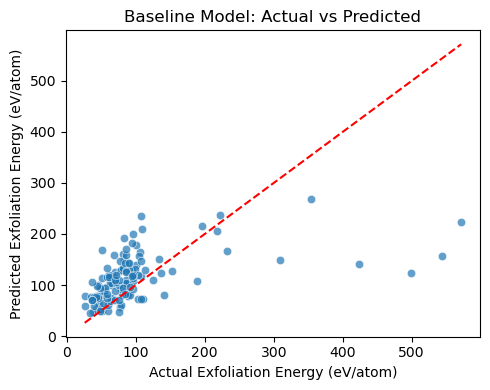

In [22]:
# -------------------------------------------------------------------
# PART B3: Baseline Regression Model
# -------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Define features (X) and target (y)
X = df_feat.drop(columns=["exfoliation_en"])
y = df_feat["exfoliation_en"]

# Split dataset (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit simple linear regression
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("🔹 Baseline Linear Regression Results")
print(f"Mean Absolute Error (MAE): {mae:.3f} eV/atom")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f} eV/atom")

# Optional: simple scatter plot of predicted vs actual
plt.figure(figsize=(5,4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Exfoliation Energy (eV/atom)")
plt.ylabel("Predicted Exfoliation Energy (eV/atom)")
plt.title("Baseline Model: Actual vs Predicted")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.tight_layout()
plt.savefig("../../figures/baseline_actual_vs_predicted.png", dpi=300)
plt.show()